In [6]:
%load_ext autoreload
%autoreload 2
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
import xeofs as xe
from src.loading import *
from src.saving import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# gSAM EOFs

In [7]:
# Get coarse files
#
w = load_coarse_gsam_w()
rho = load_gsam_reference_profiles().rho.sel(z=w.z)
mass_flux = w * rho
# Truncate gSAM data to levels below 100 hPa for computing EOFs and PCs
#
p = load_gsam_reference_profiles().p
mass_flux = mass_flux.where(p >= 100, drop=True)

In [8]:
# Compute EOFs and PCs using XEOFs package
#
model = xe.single.EOF(n_modes=10, center=False)
model.fit(mass_flux, ('lat', 'lon', 'time'))

In [9]:
# Save the outputs
#
save_path = get_project_data_dir() + f'gsam_coarse_eofs_pcs.nc'
model.save(save_path, engine='netcdf4')

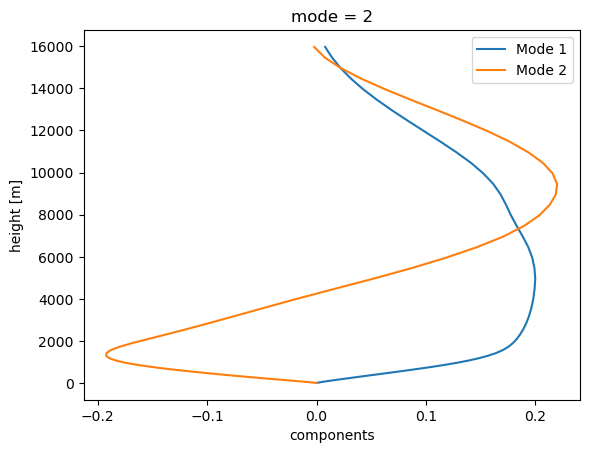

In [10]:
# Vertify that the model is ok
loaded_model = xe.single.EOF.load(save_path, engine='netcdf4')
loaded_model.components().sel(mode=1).plot(y='z', label='Mode 1')
loaded_model.components().sel(mode=2).plot(y='z', label='Mode 2')
plt.legend()

# ERA5 EOFs

In [11]:
# Get coarse files
#
w = load_coarse_era5_w()
mass_flux = -(1/9.81) * w
# Truncate ERA5 data to levels below 100 hPa for computing EOFs and PCs
#
mass_flux = mass_flux.sel(level=slice(100, None))
# Only look at 2020 data to compare to gSAM
# Remove if you want all 2010-2020 data
#
mass_flux = mass_flux.isel(time=mass_flux.time.dt.year==2020)

In [13]:
# Compute EOFs and PCs using XEOFs package
#
model = xe.single.EOF(n_modes=10, center=False)
model.fit(mass_flux, ('latitude', 'longitude', 'time'))

In [14]:
# Save the outputs
#
save_path = get_project_data_dir() + f'era5_coarse_eofs_pcs.nc'
model.save(save_path, engine='netcdf4')

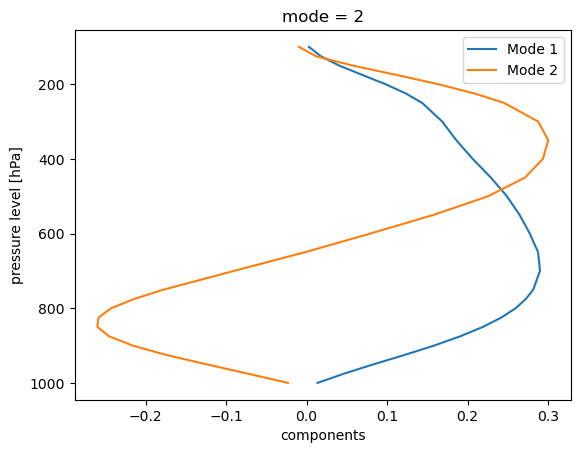

In [15]:
# Vertify that the model is ok
loaded_model = xe.single.EOF.load(save_path, engine='netcdf4')
loaded_model.components().sel(mode=1).plot(y='level', label='Mode 1')
loaded_model.components().sel(mode=2).plot(y='level', label='Mode 2')
plt.gca().invert_yaxis()
plt.ylim(None, None)
plt.legend()